In [1]:
from __future__ import print_function

In [2]:
import notebook
#notebook.nbextensions.check_nbextension("usability/python-markdown/", user = True)
E = notebook.nbextensions.EnableNBExtensionApp()
E.enable_nbextension("usability/python-markdown/main")

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#Machine Learning Engineer Nanodegree

##Project 2: Build a Student Intervention System

In [4]:
import pandas as pd
from sklearn import cross_validation

student_data = pd.read_csv("student-data.csv")

feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]  # last column is the target/label
X_all = student_data[feature_cols]  # feature values for all students
y_all = student_data[target_col]  # corresponding targets/labels

def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty
    for col, col_data in X.iteritems():
        if col_data.dtype == object:
            col_data = col_data.replace(["yes", "no"], [1, 0])
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'
        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

X_all = preprocess_features(X_all)

num_all = student_data.shape[0]  # same as len(student_data)
num_train = 300  # about 76% of the data
num_test = num_all - num_train

def split_data(X_all, y_all, num_train):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, train_size = num_train)
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = split_data(X_all, y_all, num_train = 0.76)

###Introduction

This documents presents the results for the second project within the Machine Learning Engineer Nanodegree program. This assessment required the student to leverage machine learning techniques in order to build a student intervention system which is able to predict when a student is likely to fail.

###Data

In [5]:
n_students = student_data.shape[0]
n_features = student_data.shape[1]-1
passed = student_data["passed"].value_counts()
n_passed = passed["yes"]
n_failed = passed["no"]
grad_rate = float(n_passed) / n_students
grad_rate_fm = "{0:.2f}%".format(grad_rate * 100)

list_stats = [["Total students", n_students],
              ["Total features", n_features],
              ["Passed students", n_passed],
              ["Failed students", n_failed],
              ["Graduation rate", grad_rate_fm]]

print("Table 1: Dataset Statistics Table")
df_results = pd.DataFrame(list_stats, columns = ["Statistic", "Value"])
df_results

Table 1: Dataset Statistics Table


,Statistic,Value
0,Total students,395
1,Total features,30
2,Passed students,265
3,Failed students,130
4,Graduation rate,67.09%


This assessment uses data provided via the Udacity platform. There are {{n_students}} students and {{n_features}} features within the dataset. {{n_passed}} students passed, while {{n_failed}} students failed, making the graduation rate of the class {{grad_rate_fm}}.

###Question 1

Which type of supervised machine learning problem is this, classification or regression? Why?

####Answer

Based on the provided dataset and desired output, this is a classification learning problem. Classification problems involve mapping to class labels (discrete), while regression problems involve mapping to continuous values. Since this problem involves classifiying students who need early intervention, it falls neatly within the definition of a classification learning problem.

###Question 2

Choose 3 supervised learning models that are available in scikit-learn, and appropriate for this problem.

####Answer

For this assessment, I selected three supervised learning models including, a Decision Tree classifier, Support Vector Machine classifier, and a KNeighbors classifier. Justification for selection of these models is provided as part of the answer to the next question. The scikit-learn models with default parameters are printed below.

In [6]:
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

dtc = tree.DecisionTreeClassifier()
svc = SVC()
knn = KNeighborsClassifier(algorithm = "auto")

print(dtc)
print("\n")
print(svc)
print("\n")
print(knn)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


###Question 3

For each model, what are the general applications of this model? What are its strengths and weaknesses?

####Answer

####Decision Tree

According to <a href = "http://scikit-learn.org/stable/modules/tree.html#tree">scikit learn</a>, Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Strengths:
    - Fast training and testing phases.
    - Low memory usage.
    - Simple to understand and interpret.
    - Implicitly performs variable screening or feature selection.
    
Weaknesses:
    - Has the tendency to overfit data.

####Support Vector Machine

According to <a href = "http://scikit-learn.org/stable/modules/svm.html#svm">scikit learn</a>, Support Vector Machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs use a linear hyperplane in order to separate data point, but can also be used as a non-linear classified through the use of kernels.

Strengths:
    - Low memory usage, as it only needs to store a subset of the data to make predictions.
    - SVM is effective in high dimensional spaces.
    - Versatile, as the kernel allows expert knowledge of the problem to be built into the classifier.
    
Weaknesses:
    - Slow training and testing phases.

####KNeighbors Neighbors

According to <a href = "http://scikit-learn.org/stable/modules/neighbors.html#neighbors">scikit learn</a>, supervised neighbors-based learning methods come in two flavors: classification for data with discrete labels, and regression for data with continuous labels. The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these.

Strengths:
    - Fast training phase.
    - Versatile, as it does not make any assumption about the underlying data distribution.
    
Weaknesses:
    - Slow testing phase.
    - High memory usage, as it requires storing all training data.

###Question 4

For each model, given what you know about the data so far, why did you choose this model to apply?

####Answer

The DT based classifier was included due the CPU/memory constraints related to the problem, as it requires relatively low memory usage and delivers fast training and testing phases. The SVM based classifier was also included due to its relatively low memory usage. And the KNeighbors based classifier was included due to its versatility over varying dataset distributions.

###Question 5

For each model, fit the model to the training data, try to predict labels (for both training and test sets), and measure the F1 score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

####Answer

In [7]:
import time
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    tim = end - start
    return tim

def predict_labels(clf, features, target):
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    tim = end - start
    f1_scor = f1_score(target.values, y_pred, pos_label='yes')
    return tim, f1_scor

def create_dataset(clf, X_train, y_train, X_test, y_test):
    sample_size = len(X_train)
    classifier_time = train_classifier(clf, X_train, y_train)
    train_time, train_f1 = predict_labels(clf, X_train, y_train)
    test_time, test_f1 = predict_labels(clf, X_test, y_test)
    dataset = [clf, sample_size, classifier_time, train_time, train_f1, test_time, test_f1]
    return dataset

def create_df(clf):
    samples = []
    for size in [100, 200, 300]:
        x_sample = X_train.sample(size,random_state = np.random.RandomState())
        y_sample = y_train[x_sample.index]
        samples.append((x_sample, y_sample))
    
    resultcols = ["classifier",
                  "sampleSize",
                  "classifierTime",
                  "trainTime",
                  "trainf1Score",
                  "testTime",
                  "testf1Score"]

    df_results = pd.DataFrame([])
    
    i = 0
    for x_sample, y_sample in samples:
        dataset = create_dataset(clf, x_sample, y_sample, X_test, y_test)
        df_temp = pd.DataFrame([[str(dataset[0]).split("(",1)[0],
                                 dataset[1],
                                format(dataset[2], ".4f"),
                                format(dataset[3], ".4f"),
                                format(dataset[4], ".2f"),
                                format(dataset[5], ".4f"),
                                format(dataset[6], ".2f")]], 
                               index = [i], columns = resultcols)
        df_results = df_results.append(df_temp)
        i += 1
        
    return df_results

####Decision Tree Classifier

The classifier parameters and results are shown below.

In [8]:
print(dtc)
df_dtc_results = create_df(dtc)
df_dtc_results

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


,classifier,sampleSize,classifierTime,trainTime,trainf1Score,testTime,testf1Score
0,DecisionTreeClassifier,100,0.0010,0.0010,1.00,0.0000,0.69
1,DecisionTreeClassifier,200,0.0010,0.0000,1.00,0.0010,0.77
2,DecisionTreeClassifier,300,0.0020,0.0010,1.00,0.0000,0.64


####C-Support Vector Classification

The classifier parameters and results are shown below.

In [9]:
print(svc)
df_svc_results = create_df(svc)
df_svc_results

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


,classifier,sampleSize,classifierTime,trainTime,trainf1Score,testTime,testf1Score
0,SVC,100,0.0010,0.0010,0.87,0.0010,0.72
1,SVC,200,0.0040,0.0020,0.87,0.0010,0.77
2,SVC,300,0.0070,0.0050,0.88,0.0020,0.78


####KNeighbors Classifier

The classifier parameters and results are shown below.

In [10]:
print(knn)
df_knn_results = create_df(knn)
df_knn_results

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


,classifier,sampleSize,classifierTime,trainTime,trainf1Score,testTime,testf1Score
0,KNeighborsClassifier,100,0.0000,0.0020,0.82,0.0010,0.73
1,KNeighborsClassifier,200,0.0010,0.0030,0.86,0.0020,0.78
2,KNeighborsClassifier,300,0.0010,0.0060,0.87,0.0020,0.77


###Question 6

Which model has the best test F1 score and time efficiency?

####Answer

The full set of results for each classifier is shown below, sorted according to the test time and test F1 score.

In [11]:
import pandas as pd

df_results = pd.DataFrame([])
df_results = df_results.append(df_dtc_results)
df_results = df_results.append(df_svc_results)
df_results = df_results.append(df_knn_results)
df_results.sort_values(by = ["testTime", "testf1Score"], ascending = [True, False])

,classifier,sampleSize,classifierTime,trainTime,trainf1Score,testTime,testf1Score
0,DecisionTreeClassifier,100,0.0010,0.0010,1.00,0.0000,0.69
2,DecisionTreeClassifier,300,0.0020,0.0010,1.00,0.0000,0.64
1,DecisionTreeClassifier,200,0.0010,0.0000,1.00,0.0010,0.77
1,SVC,200,0.0040,0.0020,0.87,0.0010,0.77
0,KNeighborsClassifier,100,0.0000,0.0020,0.82,0.0010,0.73
0,SVC,100,0.0010,0.0010,0.87,0.0010,0.72
2,SVC,300,0.0070,0.0050,0.88,0.0020,0.78
1,KNeighborsClassifier,200,0.0010,0.0030,0.86,0.0020,0.78
2,KNeighborsClassifier,300,0.0010,0.0060,0.87,0.0020,0.77


The DT based classifier looks to have overfitted the training data, producing a F1 score of 1.00 for all sample sizes. However, this classifier does produce quite low test times and high F1 scores. The SVM based classifier (SVC) with a sample size of 100 or 200 has both a low test time and relatively high test F1 score. Finally, the KNeighbours based classifier, although producing average test F1 scores, suffers from a high test time.

###Question 7

Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?

####Answer

Although the DT based classifier has produced superior test times and scores, its training results suggests that is has overfit the data. When considering the remaining two classifiers, it seems that the SVM based classifier has superior performance when applied to this particular dataset, both in terms to test time and test F1 score.

###Question 8

Explain to the board of supervisors in layman’s terms how the final model chosen is supposed to work.

####Answer

A SVM based classifier works by trying to build a hyperplane between points of two different classes with the highest margin. It does this by searching for the closest points between classess of data which it calls 'support vectors'. Once the closest points are found, SVM draws a line connecting them and declares the best separating line between classess as a perpendicular boundary to the connecting line. See the image below (<a href = "http://www.robots.ox.ac.uk/~cvrg/bennett00duality.pdf">ref</a>).

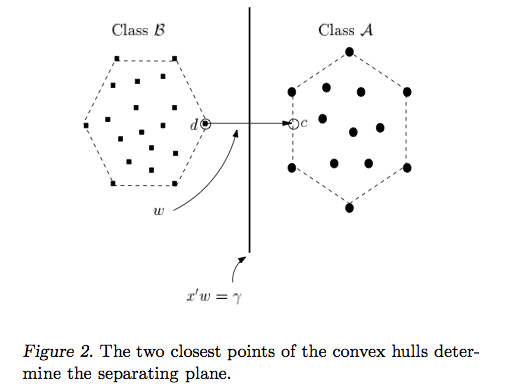

In [12]:
from IPython.display import Image

Image(filename = "data/svm_01.png")

If such as plane is not easy to find, it uses a kernal trick to bend the shape of the data environment, such that the hyperplane between points become easier to identify. Once hyperplanes are built between points, the classifier simply determines which side of the plane the point falls on, and classifies similar points within that category.

###Question 9

For the final model, use gridsearch with at least one important parameter tuned and with at least 3 settings. Use the entire training set for this.

####Answer

The SVM based classifier was passed to a GridSearchCV algorithm with the following parameter grid:

    {"kernel": ["linear", "poly", "rbf"],
    "C": [0.1, 1, 10], 
    "cache_size": [100, 200, 300],
    "gamma": [0.0, 0.001, 0.0001, "auto"]}

Descriptions of each of these parameters can be found on <a href = "http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC">scikit learn</a>:
    - kernel: Specifies the kernel type to be used in the algorithm.
    - C: Penalty parameter C of the error term.
    - cache_size: Size of the kernel cache (in MB).
    - gamma: Kernel coefficient. If gamma is ‘auto’ then 1/n_features will be used instead.

The final tuned parameter set is shown below.

In [13]:
from sklearn.metrics import f1_score, make_scorer
from sklearn import grid_search

svc = SVC()
parameters = [
  {"kernel": ["linear", "poly", "rbf"],
   "C": [0.1, 1, 10], 
   "cache_size": [100, 200, 300],
   "gamma": [0.0, 0.001, 0.0001, "auto"]}
]
scoring_function = make_scorer(f1_score, pos_label = "yes")

reg = grid_search.GridSearchCV(svc, param_grid = parameters, scoring = scoring_function)
reg.fit(X_train, y_train)

best_est = reg.best_estimator_
print(best_est)

SVC(C=1, cache_size=100, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Comparing the final set of parameters to the default cache size of 200 to 100, and a default gamma of 'auto' to 0.0. 

###Question 10

For the final model, what is the model’s final F1 score?

####Answer

The full set of results for SVM based classifier, both with and without parameter optimization is shown below, sorted according to the test time and test F1 score.

In [14]:
bestdf_svc_results = create_df(best_est)
bestdf_svc_results["GridSearchCV"] = 1
df_svc_results["GridSearchCV"] = 0

df_results = pd.DataFrame([])
df_results = df_results.append(bestdf_svc_results)
df_results = df_results.append(df_svc_results)
df_results.sort_values(by = ["testTime", "testf1Score"], ascending = [True, False])

,classifier,sampleSize,classifierTime,trainTime,trainf1Score,testTime,testf1Score,GridSearchCV
1,SVC,200,0.0200,0.0020,0.88,0.0000,0.72,1
0,SVC,100,0.0080,0.0000,0.91,0.0000,0.64,1
1,SVC,200,0.0040,0.0020,0.87,0.0010,0.77,0
0,SVC,100,0.0010,0.0010,0.87,0.0010,0.72,0
2,SVC,300,0.0780,0.0020,0.87,0.0010,0.69,1
2,SVC,300,0.0070,0.0050,0.88,0.0020,0.78,0


As it can be seen, the optimized parameter set has made a slight improvement to the test time and test F1 score over all sample sizes. Do note that the GridSearchCV algorithm was run using the full dataset.